In [70]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
import time
from ipywidgets import widgets
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
cavideos = pd.read_csv('C:/Users/SHIVANGI/Downloads/youtube-new/CAvideos.csv',index_col='video_id')
devideos = pd.read_csv('C:/Users/SHIVANGI/Downloads/youtube-new/DEvideos.csv',index_col='video_id')
frvideos = pd.read_csv('C:/Users/SHIVANGI/Downloads/youtube-new/FRvideos.csv',index_col='video_id')
gbvideos = pd.read_csv('C:/Users/SHIVANGI/Downloads/youtube-new/GBvideos.csv',index_col='video_id')
usvideos = pd.read_csv('C:/Users/SHIVANGI/Downloads/youtube-new/USvideos.csv',index_col='video_id')



In [3]:
def func(x):
    try:
        return int(x)
    except ValueError:
        return np.NaN

In [4]:
frvideos['views'] = frvideos['views'].apply(func) 
frvideos['likes'] = frvideos['likes'].apply(func)
frvideos['dislikes'] = frvideos['dislikes'].apply(func)
frvideos['comment_count'] = frvideos['comment_count'].apply(func)

cavideos['region'] = 'CA'
devideos['region'] = 'DE'
frvideos['region'] = 'FR'
gbvideos['region'] = 'GB'
usvideos['region'] = 'US'

frames = [cavideos, devideos, gbvideos, usvideos,frvideos]
allvideos = pd.concat(frames) 
allvideos.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,region
video_id,,,,,,,,,,,,,,,,
n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


In [5]:
list(allvideos)

['trending_date',
 'title',
 'channel_title',
 'category_id',
 'publish_time',
 'tags',
 'views',
 'likes',
 'dislikes',
 'comment_count',
 'thumbnail_link',
 'comments_disabled',
 'ratings_disabled',
 'video_error_or_removed',
 'description',
 'region']

In [6]:
allvideos.dtypes

trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
region                    object
dtype: object

In [7]:
allvideos.isnull().sum()

trending_date                0
title                        0
channel_title                0
category_id                  0
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description               6942
region                       0
dtype: int64

In [8]:
print(len(allvideos))

202310


In [9]:
idx1 = allvideos.groupby(['video_id'])['views'].transform(max) == allvideos['views']
topviews = allvideos[idx1].sort_values(by=['views'],ascending=False).head(10) 
topviews.loc[:,'views'] /= 1000000

idx2 = allvideos.groupby(['video_id'])['likes'].transform(max) == allvideos['likes']
toplikes = allvideos[idx2].sort_values(by=['likes'],ascending=False).head(10)

idx3 = allvideos.groupby(['video_id'])['dislikes'].transform(max) == allvideos['dislikes']
topdislikes = allvideos[idx3].sort_values(by=['dislikes'],ascending=False).head(10)

idx4 = allvideos.groupby(['video_id'])['comment_count'].transform(max) == allvideos['comment_count']
topcom = allvideos[idx4].sort_values(by=['comment_count'],ascending=False).head(10)

sns.set()

In [10]:
topviews = topviews[['title','views','region']]
topviews.head(10)







,title,views,region
video_id,,,
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,424.538912,GB
9jI-z9QN6g8,"Te Bote Remix - Casper, Nio García, Darell, Ni...",337.621571,GB
kLpH1nSLJSs,Bad Bunny - Amorfoda | Video Oficial,328.860380,GB
wfWkmURBNv8,Ozuna x Romeo Santos - El Farsante Remix,288.811992,GB
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,259.721696,GB
xpVfcZ0ZcFM,Drake - God’s Plan,258.164991,GB
ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,208.876887,GB
zEf423kYfqk,"Becky G, Natti Natasha - Sin Pijama (Official ...",200.862743,GB
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,169.884583,GB


In [11]:
toplikes = toplikes[['title','likes','region']]
toplikes.head(10)

,title,likes,region
video_id,,,
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,5613827,US
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,5613827,GB
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,5444541,GB
xpVfcZ0ZcFM,Drake - God’s Plan,4737873,GB
kLpH1nSLJSs,Bad Bunny - Amorfoda | Video Oficial,3823879,GB
ffxKSjUwKdU,Ariana Grande - No Tears Left To Cry,3394437,GB
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,3312868,GB
kTlv5_Bs8aw,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,2960250,GB
_I_D_8Z4sJE,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,2818771,GB


In [12]:

topdislikes = topdislikes[['title','dislikes','region']]
topdislikes.head(10)

,title,dislikes,region
video_id,,,
QwZT7T-TXT0,So Sorry.,1944971,GB
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,1753274,GB
oWjxSkJpxFU,Suicide: Be Here Tomorrow.,545595,GB
pOHQdIDds6s,Jake Paul - It's Everyday Bro (Remix) [feat. G...,504340,CA
qtTM2YV3bI8,Lucas Lucco e Pabllo Vittar - Paraíso,421473,GB
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,379862,GB
84LBjXaeKk4,Netta - Toy - Israel - LIVE - Grand Final - Eu...,361763,DE
84LBjXaeKk4,Netta - Toy - Israel - LIVE - Grand Final - Eu...,361763,FR
_5d-sQ7Fh5M,LOGAN PAUL IS BACK!,291900,US


In [13]:
topcomments = topcom[['title','comment_count','region']]
topcomments.head(10)

,title,comment_count,region
video_id,,,
QwZT7T-TXT0,So Sorry.,1626501,GB
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,1228655,GB
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,1228655,US
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,845233,GB
oWjxSkJpxFU,Suicide: Be Here Tomorrow.,704824,GB
kTlv5_Bs8aw,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,559197,GB
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,553371,GB
51wobJ4jOU4,Распаковка Samsung Galaxy S9+,523850,DE
OK3GJ0WIQ8s,j-hope 'Daydream (백일몽)' MV,477233,US


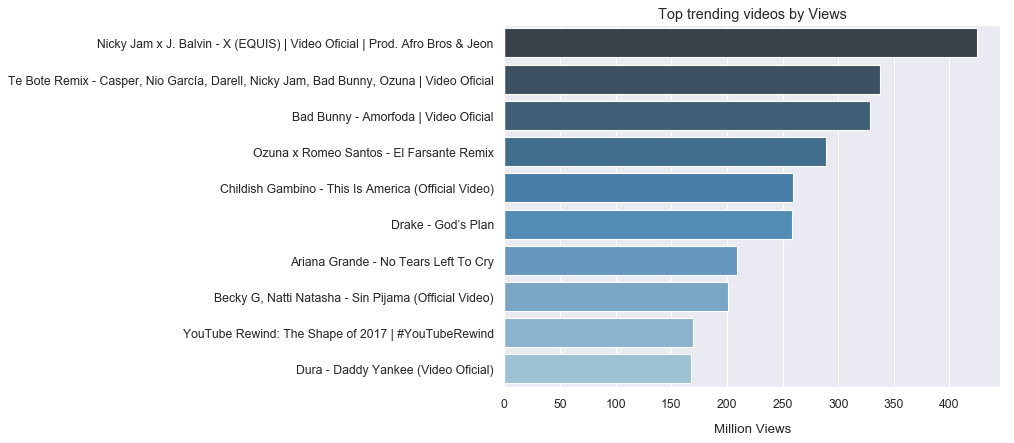

In [14]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, edgecolor='k')
ax = sns.barplot(y="title", x="views", data=topviews,palette="Blues_d")
ax.set_title('Top trending videos by Views',fontsize=13)
ax.set_xlabel("Million Views")
ax.set_ylabel("")
ax.xaxis.labelpad = 12

C:\Users\SHIVANGI\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


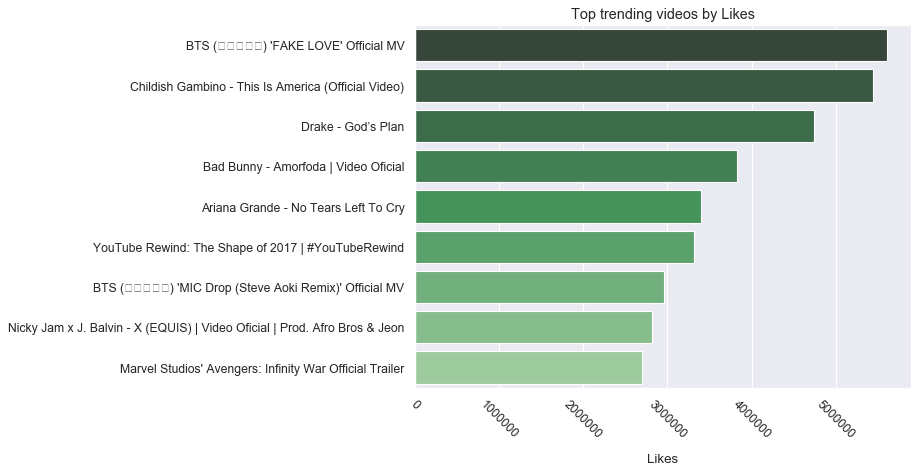

In [15]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, edgecolor='k')
ax = sns.barplot(y="title", x="likes", data=toplikes,palette="Greens_d")
ax.set_title('Top trending videos by Likes',fontsize=13)
ax.set_xlabel("Likes")
ax.set_ylabel("")
plt.xticks(rotation=-45)
ax.xaxis.labelpad = 12

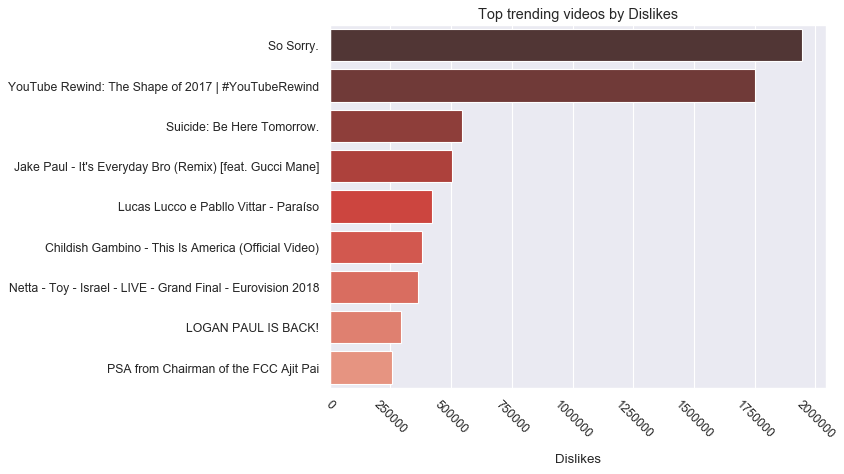

In [16]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, edgecolor='k')
ax = sns.barplot(y="title", x="dislikes", data=topdislikes,palette="Reds_d")
ax.set_title('Top trending videos by Dislikes',fontsize=13)
ax.set_xlabel("Dislikes")
plt.xticks(rotation=-45)
ax.set_ylabel("")
ax.xaxis.labelpad = 12

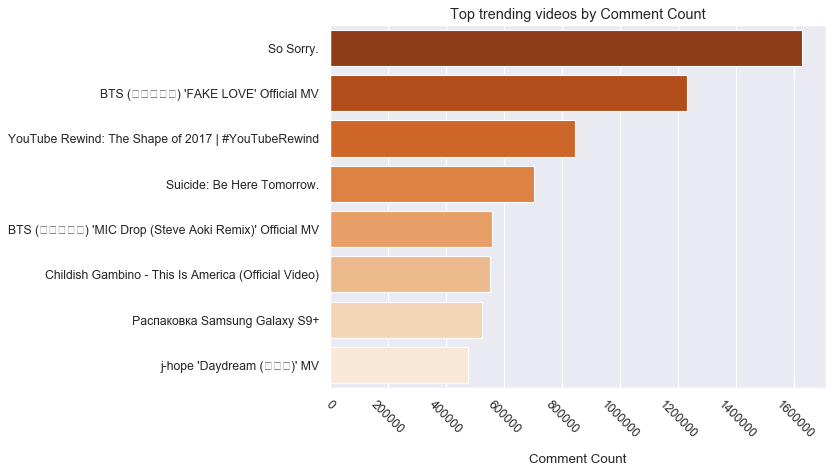

In [17]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=80, edgecolor='k')
ax = sns.barplot(y="title", x="comment_count", data=topcomments,palette="Oranges_r")
ax.set_title('Top trending videos by Comment Count',fontsize=13)
ax.set_xlabel("Comment Count")
plt.xticks(rotation=-45)
ax.set_ylabel("")
ax.xaxis.labelpad = 12

In [18]:
cordf = cavideos[(cavideos['comments_disabled'] == False) & (cavideos['ratings_disabled'] == False )][['views','likes','dislikes','comment_count']]

In [19]:
X=allvideos.drop(columns=['title','channel_title','tags','dislikes','thumbnail_link','comments_disabled','ratings_disabled','video_error_or_removed','description'])

In [20]:
X.head()

,trending_date,category_id,publish_time,views,likes,comment_count,region
video_id,,,,,,,
n1WpP7iowLc,17.14.11,10,2017-11-10T17:00:03.000Z,17158579,787425,125882,CA
0dBIkQ4Mz1M,17.14.11,23,2017-11-13T17:00:00.000Z,1014651,127794,13030,CA
5qpjK5DgCt4,17.14.11,23,2017-11-12T19:05:24.000Z,3191434,146035,8181,CA
d380meD0W0M,17.14.11,24,2017-11-12T18:01:41.000Z,2095828,132239,17518,CA
2Vv-BfVoq4g,17.14.11,10,2017-11-09T11:04:14.000Z,33523622,1634130,85067,CA


In [21]:
X.region.unique()

array(['CA', 'DE', 'GB', 'US', 'FR'], dtype=object)

In [22]:
dfDummies = pd.get_dummies(X['region'], prefix = 'region')

In [23]:
dfDummies.head()

,region_CA,region_DE,region_FR,region_GB,region_US
video_id,,,,,
n1WpP7iowLc,1,0,0,0,0
0dBIkQ4Mz1M,1,0,0,0,0
5qpjK5DgCt4,1,0,0,0,0
d380meD0W0M,1,0,0,0,0
2Vv-BfVoq4g,1,0,0,0,0


In [24]:
df = pd.concat([X, dfDummies], axis=1)

In [25]:
df.head()

,trending_date,category_id,publish_time,views,likes,comment_count,region,region_CA,region_DE,region_FR,region_GB,region_US
video_id,,,,,,,,,,,,
n1WpP7iowLc,17.14.11,10,2017-11-10T17:00:03.000Z,17158579,787425,125882,CA,1,0,0,0,0
0dBIkQ4Mz1M,17.14.11,23,2017-11-13T17:00:00.000Z,1014651,127794,13030,CA,1,0,0,0,0
5qpjK5DgCt4,17.14.11,23,2017-11-12T19:05:24.000Z,3191434,146035,8181,CA,1,0,0,0,0
d380meD0W0M,17.14.11,24,2017-11-12T18:01:41.000Z,2095828,132239,17518,CA,1,0,0,0,0
2Vv-BfVoq4g,17.14.11,10,2017-11-09T11:04:14.000Z,33523622,1634130,85067,CA,1,0,0,0,0


In [26]:
x=df.drop(columns=['region'])

In [27]:
x.head()

,trending_date,category_id,publish_time,views,likes,comment_count,region_CA,region_DE,region_FR,region_GB,region_US
video_id,,,,,,,,,,,
n1WpP7iowLc,17.14.11,10,2017-11-10T17:00:03.000Z,17158579,787425,125882,1,0,0,0,0
0dBIkQ4Mz1M,17.14.11,23,2017-11-13T17:00:00.000Z,1014651,127794,13030,1,0,0,0,0
5qpjK5DgCt4,17.14.11,23,2017-11-12T19:05:24.000Z,3191434,146035,8181,1,0,0,0,0
d380meD0W0M,17.14.11,24,2017-11-12T18:01:41.000Z,2095828,132239,17518,1,0,0,0,0
2Vv-BfVoq4g,17.14.11,10,2017-11-09T11:04:14.000Z,33523622,1634130,85067,1,0,0,0,0


In [28]:
x.trending_date.unique()

array(['17.14.11', '17.15.11', '17.16.11', '17.17.11', '17.18.11',
       '17.19.11', '17.20.11', '17.21.11', '17.22.11', '17.23.11',
       '17.24.11', '17.25.11', '17.26.11', '17.27.11', '17.28.11',
       '17.29.11', '17.30.11', '17.01.12', '17.02.12', '17.03.12',
       '17.04.12', '17.05.12', '17.06.12', '17.07.12', '17.08.12',
       '17.09.12', '17.10.12', '17.11.12', '17.12.12', '17.13.12',
       '17.14.12', '17.15.12', '17.16.12', '17.17.12', '17.18.12',
       '17.19.12', '17.20.12', '17.21.12', '17.22.12', '17.23.12',
       '17.24.12', '17.25.12', '17.26.12', '17.27.12', '17.28.12',
       '17.29.12', '17.30.12', '17.31.12', '18.01.01', '18.02.01',
       '18.03.01', '18.04.01', '18.05.01', '18.06.01', '18.07.01',
       '18.08.01', '18.09.01', '18.12.01', '18.13.01', '18.14.01',
       '18.15.01', '18.16.01', '18.17.01', '18.18.01', '18.19.01',
       '18.20.01', '18.21.01', '18.22.01', '18.23.01', '18.24.01',
       '18.25.01', '18.26.01', '18.27.01', '18.28.01', '18.29.

In [29]:
x['trending_year']=x.trending_date.str.slice(-8, -6).astype(int)

In [30]:
x['trending_month']= x.trending_date.str.slice(-2,).astype(int)

In [31]:
x.head()

,trending_date,category_id,publish_time,views,likes,comment_count,region_CA,region_DE,region_FR,region_GB,region_US,trending_year,trending_month
video_id,,,,,,,,,,,,,
n1WpP7iowLc,17.14.11,10,2017-11-10T17:00:03.000Z,17158579,787425,125882,1,0,0,0,0,17,11
0dBIkQ4Mz1M,17.14.11,23,2017-11-13T17:00:00.000Z,1014651,127794,13030,1,0,0,0,0,17,11
5qpjK5DgCt4,17.14.11,23,2017-11-12T19:05:24.000Z,3191434,146035,8181,1,0,0,0,0,17,11
d380meD0W0M,17.14.11,24,2017-11-12T18:01:41.000Z,2095828,132239,17518,1,0,0,0,0,17,11
2Vv-BfVoq4g,17.14.11,10,2017-11-09T11:04:14.000Z,33523622,1634130,85067,1,0,0,0,0,17,11


In [32]:
def get_part_of_day(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )

In [33]:
x['published_time']=x.publish_time.str.slice(-13,-11).astype(int)

In [34]:
x=x.drop(columns=['publish_time','trending_date','published_time'])

In [35]:
x.head()

,category_id,views,likes,comment_count,region_CA,region_DE,region_FR,region_GB,region_US,trending_year,trending_month
video_id,,,,,,,,,,,
n1WpP7iowLc,10,17158579,787425,125882,1,0,0,0,0,17,11
0dBIkQ4Mz1M,23,1014651,127794,13030,1,0,0,0,0,17,11
5qpjK5DgCt4,23,3191434,146035,8181,1,0,0,0,0,17,11
d380meD0W0M,24,2095828,132239,17518,1,0,0,0,0,17,11
2Vv-BfVoq4g,10,33523622,1634130,85067,1,0,0,0,0,17,11


In [49]:
y = allvideos[['likes']]

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=9)

In [75]:
#Random Forest
reg = RandomForestRegressor(max_depth=2, random_state=0,n_estimators=100)
reg.fit(x_train, y_train)

C:\Users\SHIVANGI\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [78]:
pre = reg.predict(x_test)

In [79]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pre)))

test_set_r2 = r2_score(y_test, pre)

In [80]:
print(test_set_rmse)
print(test_set_r2)

66765.85092023366
0.9012166078809062
